#Task Day 7

Get Basic Sales Summary from a Tiny SQLite Database using Python

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

#Creating SQLite Database

In [19]:
#Create database
data = sqlite3.connect("sales_data.db")
cursor = data.cursor()

In [20]:
#Create sales data
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    Id INTEGER PRIMARY KEY,
    Product TEXT,
    Quantity INTEGER,
    Price REAL
)
""")

In [21]:
#Insert data
sample_data = [
    ('Laptop', 2, 750.00),
    ('Smartphone', 5, 300.00),
    ('Headphones', 10, 50.00),
    ('Monitor', 3, 150.00),
    ('Keyboard', 7, 25.00),
    ('Mouse', 12, 20.00),
    ('Laptop', 1, 750.00),
    ('Smartphone', 3, 300.00),
    ('Monitor', 2, 150.00),
    ('Keyboard', 5, 25.00),
    ('Mouse', 8, 20.00),
    ('Headphones', 4, 50.00),
]

In [22]:
cursor.executemany("INSERT INTO sales (Product, Quantity, Price) VALUES (?, ?, ?)", sample_data)

In [23]:
data.commit()
data.close()

#Query and Visualizing the Data

In [27]:
# Reconnect to database
data = sqlite3.connect("sales_data.db")

In [28]:
# SQL query
query = """
SELECT Product,
       SUM(Quantity) AS Total_qty,
       SUM(Quantity * Price) AS Revenue
FROM sales
GROUP BY Product
"""

In [29]:
# Load into pandas
df = pd.read_sql_query(query, data)

In [30]:
# Print the summary
print("Sales Summary:")
print(df)

Sales Summary:
      product  Total_qty  Revenue
0  Headphones         42   2100.0
1    Keyboard         36    900.0
2      Laptop          9   6750.0
3     Monitor         15   2250.0
4       Mouse         60   1200.0
5  Smartphone         24   7200.0


In [37]:
#Total Sales Summary (Overall)
total_summary = df[['Total_qty', 'Revenue']].sum()
print("Overall Total Quantity Sold:", total_summary['Total_qty'])
print("Overall Total Revenue: $", round(total_summary['Revenue'], 2))

Overall Total Quantity Sold: 186.0
Overall Total Revenue: $ 20400.0


In [39]:
#Sort Products by Revenue (Descending)
df_sorted = df.sort_values(by='Revenue', ascending=False)
print("Products Sorted by Revenue:\n", df_sorted)

Products Sorted by Revenue:
       product  Total_qty  Revenue
5  Smartphone         24   7200.0
2      Laptop          9   6750.0
3     Monitor         15   2250.0
0  Headphones         42   2100.0
4       Mouse         60   1200.0
1    Keyboard         36    900.0


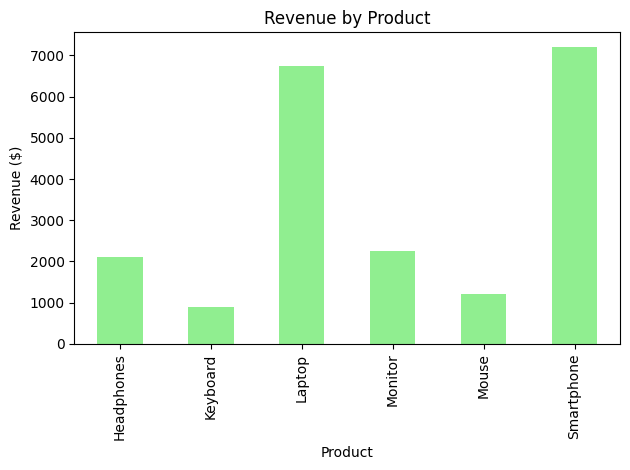

In [42]:
# Plot
df.plot(kind='bar', x='product', y='Revenue', color='lightgreen', legend=False)
plt.title("Revenue by Product")
plt.ylabel("Revenue ($)")
plt.xlabel("Product")
plt.tight_layout()
plt.show()

In [ ]:
plt.savefig("sales_chart.png")

from google.colab import files
files.download("sales_chart.png")

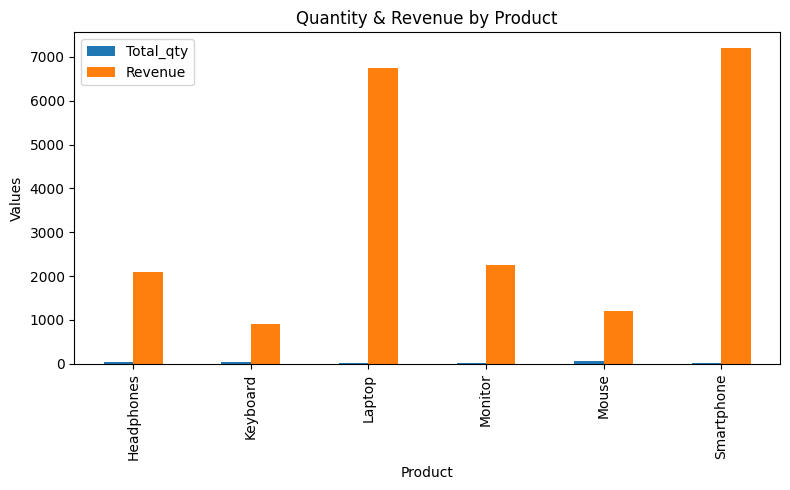

In [40]:
#Plot Quantity & Revenue Side by Side
df.plot(kind='bar', x='product', y=['Total_qty', 'Revenue'], figsize=(8,5))
plt.title("Quantity & Revenue by Product")
plt.ylabel("Values")
plt.xlabel("Product")
plt.tight_layout()
plt.show()

In [41]:
plt.savefig("Quantity & Revenue.png")

from google.colab import files
files.download("Quantity & Revenue.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [43]:
#Best-Selling Product
top_product = df.loc[df['Revenue'].idxmax()]
print(f"Top Product by Revenue: {top_product['product']} (${top_product['Revenue']})")

Top Product by Revenue: Smartphone ($7200.0)


In [44]:
data.close()

In [45]:
#Download summary
df.to_csv("sales_summary.csv", index=False)

from google.colab import files
files.download("sales_summary.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>